In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
import yfinance as yf
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [2]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt


In [3]:
import json
import os
import pymongo
from pymongo import MongoClient

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.datasets import make_blobs
import pandas as pd
import tensorflow as tf
import matplotlib as plt 

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [80]:
Soybeans=yf.Ticker("ZS=F")
Corn=yf.Ticker("ZC=F")
Wheat=yf.Ticker("ZW=F")
Cotton=yf.Ticker("CT=F")
Crude=yf.Ticker("CL=F")
USDBRL=yf.Ticker("BRL=X")
EURUSD=yf.Ticker("EURUSD=X")
IR=yf.Ticker("^TNX")
Hold_Signal=-.05
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

In [159]:
Soybeans_H=Soybeans.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
Soybeans_H["Range"]=Soybeans_H["High"]-Soybeans_H["Low"]
Soybeans_H=Soybeans_H.drop(["High","Low"], axis=1)

Soybeans_H['log_rtn'] = np.log(Soybeans_H['Close']).diff()

# Var Swap (returns are not demeaned)
Soybeans_H['real_var'] = np.square(Soybeans_H['log_rtn']).rolling(window).sum() * ann_factor
Soybeans_H['Vol'] = np.sqrt(Soybeans_H['real_var'])


Soybeans_P=Soybeans_H[:len(Soybeans_H)-window]
Soybeans_P=Soybeans_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1).reset_index()
Soybeans_H=Soybeans_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1).reset_index()
Soybeans_P=Soybeans_P.drop("Date",axis=1)

Soybeans_H["Price_Change"]=(Soybeans_H["Close"]-Soybeans_P["Close"])/Soybeans_P["Close"]
Soybeans_H["Buy/Hold"]=np.where(Soybeans_H["Price_Change"]< Hold_Signal, "Hold","Buy")
#Soybeans_H["Past_Price"]=Soybeans_P["Close"]
#Soybeans_H=Soybeans_H.set_index('Date')
#Soybeans_P=Soybeans_P.set_index('Date')
#Soybeans_H["Buy/Hold"].hist(figsize = (12,10))
#plt.show()
Soybeans_P

,Close,Range,Vol
0,1050.75,11.50,0.172270
1,1056.50,15.25,0.172052
2,1051.75,11.25,0.172080
3,1057.25,25.00,0.171875
4,1082.25,12.25,0.167368
...,...,...,...
4939,459.75,1.25,0.169929
4940,461.25,1.50,0.170212
4941,459.75,2.25,0.170160
4942,467.00,2.00,0.168136


In [160]:
Corn_H=Corn.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
Corn_H["Range"]=Corn_H["High"]-Corn_H["Low"]
Corn_H=Corn_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

Corn_H['log_rtn'] = np.log(Corn_H['Close']).diff()

# Var Swap (returns are not demeaned)
Corn_H['real_var'] = np.square(Corn_H['log_rtn']).rolling(window).sum() * ann_factor
Corn_H['Vol'] = np.sqrt(Corn_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

Corn_P=Corn_H[:len(Corn_H)-90]
Corn_P=Corn_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1).reset_index()
Corn_H=Corn_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1).reset_index()
Corn_P=Corn_P.drop("Date",axis=1)

Corn_H["Price_Change"]=(Corn_H["Close"]-Corn_P["Close"])/Corn_P["Close"]
Corn_H["Buy/Hold"]=np.where(Corn_H["Price_Change"]< Hold_Signal, "Hold","Buy")
#Corn_H["Past_Price"]=Corn_P["Close"]
#Corn_H=Corn_H.set_index('Date')
#Corn_P=Corn_P.set_index('Date')
#Corn_H["Buy/Hold"].hist(figsize = (12,10))
#plt.show()
Corn_P

,Close,Range,Vol
0,397.5,4.75,0.234100
1,398.5,5.75,0.236894
2,398.5,11.25,0.236926
3,401.5,14.75,0.237179
4,416.0,6.75,0.230636
...,...,...,...
4947,220.0,1.00,0.183245
4948,218.0,0.00,0.183278
4949,215.5,0.00,0.185854
4950,210.0,0.00,0.181116


In [161]:
Wheat_H=Wheat.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
Wheat_H["Range"]=Wheat_H["High"]-Wheat_H["Low"]
Wheat_H=Wheat_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

Wheat_H['log_rtn'] = np.log(Wheat_H['Close']).diff()

# Var Swap (returns are not demeaned)
Wheat_H['real_var'] = np.square(Wheat_H['log_rtn']).rolling(window).sum() * ann_factor
Wheat_H['Vol'] = np.sqrt(Wheat_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

Wheat_P=Wheat_H[:len(Wheat_H)-90]
Wheat_P=Wheat_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1).reset_index()
Wheat_H=Wheat_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1).reset_index()
Wheat_P=Wheat_P.drop("Date",axis=1)

Wheat_H["Price_Change"]=(Wheat_H["Close"]-Wheat_P["Close"])/Wheat_P["Close"]
Wheat_H["Buy/Hold"]=np.where(Wheat_H["Price_Change"]< Hold_Signal, "Hold","Buy")
#Wheat_H["Past_Price"]=Wheat_P["Close"]
#Wheat_H=Wheat_H.set_index('Date')
#Wheat_P=Wheat_P.set_index('Date')

Wheat_P

,Close,Range,Vol
0,607.50,18.50,0.283180
1,598.50,12.00,0.282717
2,603.75,12.75,0.282817
3,608.75,13.75,0.282501
4,615.75,12.25,0.282152
...,...,...,...
4935,252.50,2.00,0.245302
4936,256.25,1.75,0.244064
4937,256.50,1.75,0.244438
4938,261.00,1.00,0.244068


In [162]:
Cotton_H=Cotton.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
Cotton_H["Range"]=Cotton_H["High"]-Cotton_H["Low"]
Cotton_H=Cotton_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

Cotton_H['log_rtn'] = np.log(Cotton_H['Close']).diff()

# Var Swap (returns are not demeaned)
Cotton_H['real_var'] = np.square(Cotton_H['log_rtn']).rolling(window).sum() * ann_factor
Cotton_H['Vol'] = np.sqrt(Cotton_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

Cotton_P=Cotton_H[:len(Cotton_H)-90]
Cotton_P=Cotton_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1).reset_index()
Cotton_H=Cotton_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1).reset_index()
Cotton_P=Cotton_P.drop("Date",axis=1)


Cotton_H["Price_Change"]=(Cotton_H["Close"]-Cotton_P["Close"])/Cotton_P["Close"]
Cotton_H["Buy/Hold"]=np.where(Cotton_H["Price_Change"]< Hold_Signal, "Hold","Buy")
#Cotton_H["Past_Price"]=Cotton_P["Close"]
#Cotton_H=Cotton_H.set_index('Date')
#Cotton_P=Cotton_P.set_index('Date')
Cotton_P


,Close,Range,Vol
0,68.730003,1.029999,0.198953
1,68.919998,1.680000,0.198941
2,69.820000,0.879997,0.201191
3,70.169998,2.549995,0.201494
4,72.029999,0.769997,0.198378
...,...,...,...
5099,62.070000,1.299999,0.257533
5100,62.619999,0.550003,0.263868
5101,62.750000,1.489998,0.264379
5102,62.230000,1.000000,0.265405


In [163]:
Crude_H=Crude.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
Crude_H["Range"]=Crude_H["High"]-Crude_H["Low"]
Crude_H=Crude_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

Crude_H['log_rtn'] = np.log(Crude_H['Close']).diff()

# Var Swap (returns are not demeaned)
Crude_H['real_var'] = np.square(Crude_H['log_rtn']).rolling(window).sum() * ann_factor
Crude_H['Vol'] = np.sqrt(Crude_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

Crude_P=Crude_H[:len(Crude_H)-90]
Crude_P=Crude_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1).reset_index()
Crude_H=Crude_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1).reset_index()
Crude_P=Crude_P.drop("Date",axis=1)
Crude_P

,Close,Range,Vol
0,36.810001,3.510002,0.365571
1,35.790001,1.389999,0.363855
2,36.169998,2.840000,0.377144
3,37.389999,2.039997,0.373056
4,39.570000,1.320004,0.362017
...,...,...,...
4855,27.719999,0.850000,0.480530
4856,27.350000,1.250000,0.480065
4857,28.000000,1.000000,0.480317
4858,28.200001,0.930000,0.480676


In [164]:
USDBRL_H=USDBRL.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)

USDBRL_H["Range"]=USDBRL_H["High"]-USDBRL_H["Low"]
USDBRL_H=USDBRL_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

USDBRL_H['log_rtn'] = np.log(USDBRL_H['Close']).diff()

# Var Swap (returns are not demeaned)
USDBRL_H['real_var'] = np.square(USDBRL_H['log_rtn']).rolling(window).sum() * ann_factor
USDBRL_H['Vol'] = np.sqrt(USDBRL_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

USDBRL_P=USDBRL_H[:len(USDBRL_H)-90]
USDBRL_P=USDBRL_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1).reset_index()
USDBRL_H=USDBRL_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1).reset_index()#[:len(Soybeans_H)]
USDBRL_P=USDBRL_P.drop("Date",axis=1)
USDBRL_P

,Close,Range,Vol
0,5.4139,0.071600,0.188908
1,5.3847,0.069791,0.188834
2,5.3627,0.154900,0.189189
3,5.5234,0.119000,0.183230
4,5.6630,0.124500,0.178908
...,...,...,...
3861,2.8840,0.000000,0.079259
3862,2.8840,0.014000,0.079424
3863,2.8700,0.016000,0.079301
3864,2.8740,0.005000,0.079267


In [165]:
EURUSD_H=EURUSD.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
EURUSD_H["Range"]=EURUSD_H["High"]-EURUSD_H["Low"]
EURUSD_H=EURUSD_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

EURUSD_H['log_rtn'] = np.log(EURUSD_H['Close']).diff()

# Var Swap (returns are not demeaned)
EURUSD_H['real_var'] = np.square(EURUSD_H['log_rtn']).rolling(window).sum() * ann_factor
EURUSD_H['Vol'] = np.sqrt(EURUSD_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

EURUSD_P=EURUSD_H[:len(EURUSD_H)-90]
EURUSD_P=EURUSD_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1).reset_index()
EURUSD_H=EURUSD_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1).reset_index()#[:len(Soybeans_H)]
EURUSD_P=EURUSD_P.drop("Date",axis=1)

EURUSD_P

,Close,Range,Vol
0,1.181879,0.008563,0.068060
1,1.182732,0.006279,0.068278
2,1.189301,0.012177,0.068343
3,1.181754,0.009440,0.067522
4,1.173268,0.014401,0.066467
...,...,...,...
4279,1.208605,0.004604,0.123308
4280,1.207700,0.015008,0.124165
4281,1.216604,0.013900,0.123692
4282,1.213106,0.015698,0.123687


In [166]:
IR_H=IR.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
IR_H["Range"]=IR_H["High"]-IR_H["Low"]
IR_H=IR_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

IR_H['log_rtn'] = np.log(IR_H['Close']).diff()

# Var Swap (returns are not demeaned)
IR_H['real_var'] = np.square(IR_H['log_rtn']).rolling(window).sum() * ann_factor
IR_H['Vol'] = np.sqrt(IR_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

IR_P=IR_H[:len(IR_H)-90]
IR_P=IR_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1).reset_index()
IR_H=IR_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1).reset_index()#[:len(Soybeans_H)]
IR_P=IR_P.drop("Date",axis=1)
IR_P

,Close,Range,Vol
0,0.849,0.027,0.660260
1,0.860,0.049,0.660369
2,0.835,0.073,0.661255
3,0.781,0.037,0.651831
4,0.778,0.025,0.652013
...,...,...,...
14592,3.870,0.000,0.082033
14593,3.860,0.000,0.082024
14594,3.870,0.000,0.082863
14595,3.850,0.000,0.084082


In [167]:
Soybeans_H=Soybeans_H.rename(columns={"Range": "Soybeans Range", "Close": "Soybeans Close", "Vol" : "Soybeans Vol"})[:len(USDBRL_H)]
Corn_H=Corn_H.rename(columns={"Range": "Corn Range", "Close": "Corn Close", "Vol" : "Corn Vol"})[:len(USDBRL_H)]

Wheat_H=Wheat_H.rename(columns={"Range": "Wheat Range", "Close": "Wheat Close", "Vol" : "Wheat Vol"})[:len(USDBRL_H)]
Cotton_H=Cotton_H.rename(columns={"Range": "Cotton Range","Close": "Cotton Close", "Vol" : "Cotton Vol"})[:len(USDBRL_H)]
Crude_H=Crude_H.rename(columns={"Range": "Crude Range","Close": "Crude Close", "Vol" : "Crude Vol"})[:len(USDBRL_H)]
USDBRL_H=USDBRL_H.rename(columns={"Range": "USDBRL Range", "Close": "USDBRL Close", "Vol" : "USDBRL Vol"})[:len(USDBRL_H)]
EURUSD_H=EURUSD_H.rename(columns={"Range": "EURUSD Range", "Close": "EURUSD Close", "Vol" : "EURUSD Vol"})[:len(USDBRL_H)]
IR_H=IR_H.rename(columns={"Range": "IR Range", "Close": "IR Close", "Vol" : "IR Vol"})[:len(USDBRL_H)]

In [168]:
Soybeans_P=Soybeans_P.rename(columns={"Range": "Soybeans P_Range", "Close": "Soybeans P_Close", "Vol" : "Soybeans P_Vol"})[:len(USDBRL_P)]
Corn_P=Corn_P.rename(columns={"Range": "Corn P_Range", "Close": "Corn P_Close", "Vol" : "Corn P_Vol"})[:len(USDBRL_P)]

Wheat_P=Wheat_P.rename(columns={"Range": "Wheat P_Range", "Close": "Wheat P_Close", "Vol" : "Wheat P_Vol"})[:len(USDBRL_P)]
Cotton_P=Cotton_P.rename(columns={"Range": "Cotton P_Range","Close": "Cotton P_Close", "Vol" : "Cotton P_Vol"})[:len(USDBRL_P)]
Crude_P=Crude_P.rename(columns={"Range": "Crude P_Range","Close": "Crude P_Close", "Vol" : "Crude P_Vol"})[:len(USDBRL_P)]
USDBRL_P=USDBRL_P.rename(columns={"Range": "USDBRL P_Range", "Close": "USDBRL P_Close", "Vol" : "USDBRL P_Vol"})[:len(USDBRL_P)]
EURUSD_P=EURUSD_P.rename(columns={"Range": "EURUSD P_Range", "Close": "EURUSD P_Close", "Vol" : "EURUSD P_Vol"})[:len(USDBRL_P)]
IR_P=IR_P.rename(columns={"Range": "IR P_Range", "Close": "IR P_Close", "Vol" : "IR P_Vol"})[:len(USDBRL_P)]

In [169]:
Corn_P

,Corn P_Close,Corn P_Range,Corn P_Vol
0,397.50,4.75,0.234100
1,398.50,5.75,0.236894
2,398.50,11.25,0.236926
3,401.50,14.75,0.237179
4,416.00,6.75,0.230636
...,...,...,...
3861,207.50,1.75,0.235973
3862,207.00,1.75,0.243240
3863,195.25,0.00,0.222758
3864,196.25,0.00,0.222681


In [170]:
Prices_S = [Corn_P, Wheat_P, Cotton_P, Crude_P, USDBRL_P, EURUSD_P, IR_P]
Prices_C= [Soybeans_P, Wheat_P, Cotton_P, Crude_P, USDBRL_P, EURUSD_P, IR_P]
Prices_W= [Soybeans_P, Corn_P, Cotton_P, Crude_P, USDBRL_P, EURUSD_P, IR_P]
Prices_Ctn= [Soybeans_P, Wheat_P, Corn_P, Crude_P, USDBRL_P, EURUSD_P, IR_P]


In [171]:
for price in Prices_S:
    Soybeans_H=Soybeans_H.merge(price, how="outer", left_index=True, right_index=True)
    
Soybeans_H


,Date,Soybeans Close,Soybeans Range,Soybeans Vol,Price_Change,Buy/Hold,Corn P_Close,Corn P_Range,Corn P_Vol,Wheat P_Close,...,Crude P_Vol,USDBRL P_Close,USDBRL P_Range,USDBRL P_Vol,EURUSD P_Close,EURUSD P_Range,EURUSD P_Vol,IR P_Close,IR P_Range,IR P_Vol
0,2021-03-17,1415.75,17.25,0.208055,0.347371,Buy,397.5,4.75,0.234100,607.50,...,0.365571,5.4139,0.071600,0.188908,1.181879,0.008563,0.068060,0.849,0.027,0.660260
1,2021-03-16,1423.25,12.25,0.208067,0.347137,Buy,398.5,5.75,0.236894,598.50,...,0.363855,5.3847,0.069791,0.188834,1.182732,0.006279,0.068278,0.860,0.049,0.660369
2,2021-03-15,1419.50,21.75,0.208157,0.349655,Buy,398.5,11.25,0.236926,603.75,...,0.377144,5.3627,0.154900,0.189189,1.189301,0.012177,0.068343,0.835,0.073,0.661255
3,2021-03-12,1415.75,29.25,0.208293,0.339087,Buy,401.5,14.75,0.237179,608.75,...,0.373056,5.5234,0.119000,0.183230,1.181754,0.009440,0.067522,0.781,0.037,0.651831
4,2021-03-11,1415.50,14.00,0.211932,0.307923,Buy,416.0,6.75,0.230636,615.75,...,0.362017,5.6630,0.124500,0.178908,1.173268,0.014401,0.066467,0.778,0.025,0.652013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,2005-05-19,629.25,6.50,0.274716,0.123661,Buy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3952,2005-05-18,633.25,7.00,0.275632,0.147712,Buy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3953,2005-05-17,620.75,7.25,0.275312,0.145824,Buy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3954,2005-05-16,623.50,6.00,0.276267,0.167603,Buy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
for price in Prices_C:
    Corn_H=Corn_H.merge(price, how="outer", left_index=True, right_index=True)
    
Corn_H

,Date,Corn Close,Corn Range,Corn Vol,Price_Change,Buy/Hold,Soybeans P_Close,Soybeans P_Range,Soybeans P_Vol,Wheat P_Close,...,Crude P_Vol,USDBRL P_Close,USDBRL P_Range,USDBRL P_Vol,EURUSD P_Close,EURUSD P_Range,EURUSD P_Vol,IR P_Close,IR P_Range,IR P_Vol
0,2021-03-17,556.25,6.50,0.249010,0.399371,Buy,1050.75,11.50,0.172270,607.50,...,0.365571,5.4139,0.071600,0.188908,1.181879,0.008563,0.068060,0.849,0.027,0.660260
1,2021-03-16,554.25,8.75,0.248972,0.390841,Buy,1056.50,15.25,0.172052,598.50,...,0.363855,5.3847,0.069791,0.188834,1.182732,0.006279,0.068278,0.860,0.049,0.660369
2,2021-03-15,549.50,18.00,0.248555,0.378921,Buy,1051.75,11.25,0.172080,603.75,...,0.377144,5.3627,0.154900,0.189189,1.189301,0.012177,0.068343,0.835,0.073,0.661255
3,2021-03-12,549.25,7.00,0.248871,0.367995,Buy,1057.25,25.00,0.171875,608.75,...,0.373056,5.5234,0.119000,0.183230,1.181754,0.009440,0.067522,0.781,0.037,0.651831
4,2021-03-11,555.00,9.25,0.255259,0.334135,Buy,1082.25,12.25,0.167368,615.75,...,0.362017,5.6630,0.124500,0.178908,1.173268,0.014401,0.066467,0.778,0.025,0.652013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,2005-05-17,207.50,1.75,0.235973,-0.005988,Buy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3952,2005-05-16,207.00,1.75,0.243240,0.027295,Buy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3953,2005-05-13,195.25,0.00,0.222758,-0.028607,Buy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3954,2005-05-12,196.25,0.00,0.222681,-0.027261,Buy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
for price in Prices_W:
    Wheat_H=Wheat_H.merge(price, how="outer", left_index=True, right_index=True)
    
Wheat_H

,Date,Wheat Close,Wheat Range,Wheat Vol,Price_Change,Buy/Hold,Soybeans P_Close,Soybeans P_Range,Soybeans P_Vol,Corn P_Close,...,Crude P_Vol,USDBRL P_Close,USDBRL P_Range,USDBRL P_Vol,EURUSD P_Close,EURUSD P_Range,EURUSD P_Vol,IR P_Close,IR P_Range,IR P_Vol
0,2021-03-17,639.50,10.25,0.274282,0.052675,Buy,1050.75,11.50,0.172270,397.5,...,0.365571,5.4139,0.071600,0.188908,1.181879,0.008563,0.068060,0.849,0.027,0.660260
1,2021-03-16,647.00,16.25,0.274725,0.081036,Buy,1056.50,15.25,0.172052,398.5,...,0.363855,5.3847,0.069791,0.188834,1.182732,0.006279,0.068278,0.860,0.049,0.660369
2,2021-03-15,645.00,11.75,0.275064,0.068323,Buy,1051.75,11.25,0.172080,398.5,...,0.377144,5.3627,0.154900,0.189189,1.189301,0.012177,0.068343,0.835,0.073,0.661255
3,2021-03-12,631.75,0.00,0.273211,0.037782,Buy,1057.25,25.00,0.171875,401.5,...,0.373056,5.5234,0.119000,0.183230,1.181754,0.009440,0.067522,0.781,0.037,0.651831
4,2021-03-11,636.25,13.75,0.273623,0.033293,Buy,1082.25,12.25,0.167368,416.0,...,0.362017,5.6630,0.124500,0.178908,1.173268,0.014401,0.066467,0.778,0.025,0.652013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,2005-05-19,309.50,2.50,0.282267,0.005686,Buy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3952,2005-05-18,315.00,1.75,0.280933,0.016949,Buy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3953,2005-05-17,310.00,2.50,0.279772,0.005677,Buy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3954,2005-05-16,306.25,2.25,0.282926,0.021685,Buy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
for price in Prices_Ctn:
    Cotton_H=Cotton_H.merge(price, how="outer", left_index=True, right_index=True)
    
Cotton_H

,Date,Cotton Close,Cotton Range,Cotton Vol,Price_Change,Buy/Hold,Soybeans P_Close,Soybeans P_Range,Soybeans P_Vol,Wheat P_Close,...,Crude P_Vol,USDBRL P_Close,USDBRL P_Range,USDBRL P_Vol,EURUSD P_Close,EURUSD P_Range,EURUSD P_Vol,IR P_Close,IR P_Range,IR P_Vol
0,2021-03-17,86.639999,1.320000,0.253478,0.260585,Buy,1050.75,11.50,0.172270,607.50,...,0.365571,5.4139,0.071600,0.188908,1.181879,0.008563,0.068060,0.849,0.027,0.660260
1,2021-03-16,86.919998,1.409996,0.253463,0.261172,Buy,1056.50,15.25,0.172052,598.50,...,0.363855,5.3847,0.069791,0.188834,1.182732,0.006279,0.068278,0.860,0.049,0.660369
2,2021-03-15,86.720001,2.290001,0.254362,0.242051,Buy,1051.75,11.25,0.172080,603.75,...,0.377144,5.3627,0.154900,0.189189,1.189301,0.012177,0.068343,0.835,0.073,0.661255
3,2021-03-12,87.559998,2.540001,0.253988,0.247827,Buy,1057.25,25.00,0.171875,608.75,...,0.373056,5.5234,0.119000,0.183230,1.181754,0.009440,0.067522,0.781,0.037,0.651831
4,2021-03-11,88.349998,3.549995,0.257294,0.226572,Buy,1082.25,12.25,0.167368,615.75,...,0.362017,5.6630,0.124500,0.178908,1.173268,0.014401,0.066467,0.778,0.025,0.652013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,2005-05-13,53.750000,1.850002,0.305261,0.208137,Buy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3952,2005-05-12,55.080002,1.350002,0.302831,0.248413,Buy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3953,2005-05-11,56.799999,1.550003,0.299429,0.268707,Buy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3954,2005-05-10,55.930000,0.990002,0.299686,0.270848,Buy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


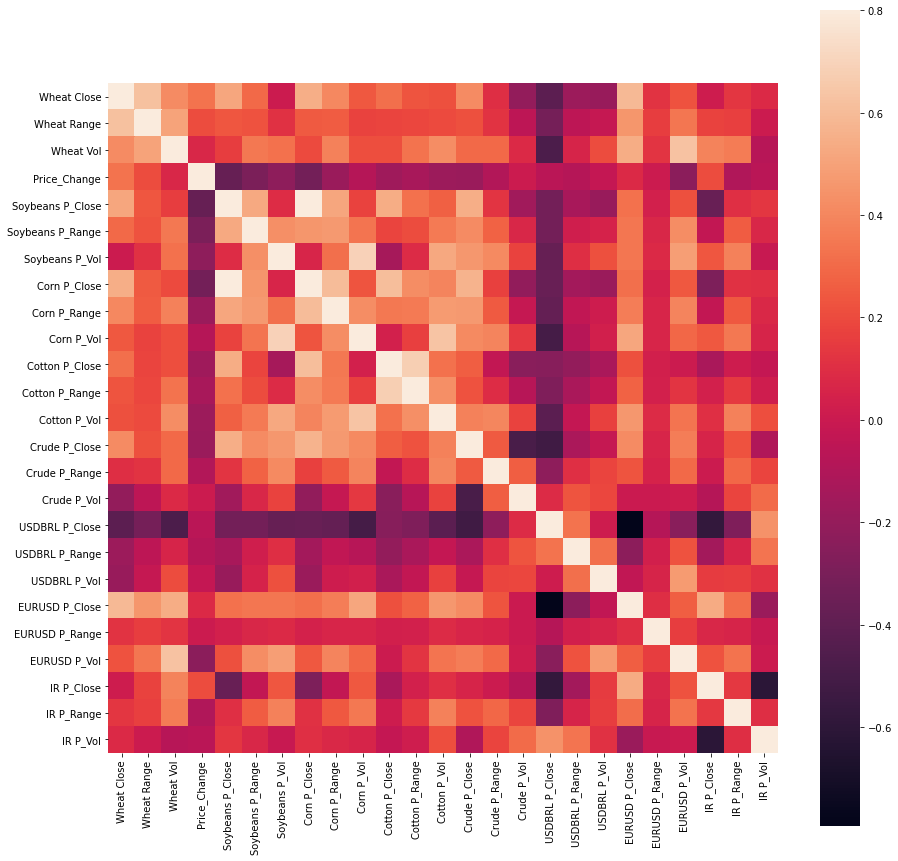

In [177]:
C_mat = Wheat_H.corr()
fig = plt.figure(figsize = (15,15))
sb.heatmap(C_mat, vmax=.8, square = True)
plt.show()

In [181]:

App_cat = Soybeans_H.dtypes[Soybeans_H.dtypes == "object"].index.tolist()

enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(Soybeans_H[App_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(App_cat)
encode_df.head()

,Buy/Hold_Buy,Buy/Hold_Hold
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [182]:
Soybeans_H = Soybeans_H.merge(encode_df,left_index=True, right_index=True)
Soybeans_H = Soybeans_H.drop(App_cat,1)
Soybeans_H.head()

,Soybeans Close,Soybeans Range,Soybeans Vol,Price_Change,Corn P_Close,Corn P_Range,Corn P_Vol,Wheat P_Close,Wheat P_Range,Wheat P_Vol,...,USDBRL P_Range,USDBRL P_Vol,EURUSD P_Close,EURUSD P_Range,EURUSD P_Vol,IR P_Close,IR P_Range,IR P_Vol,Buy/Hold_Buy,Buy/Hold_Hold
0,1415.75,17.25,0.208055,0.347371,397.5,4.75,0.234100,607.50,18.50,0.283180,...,0.071600,0.188908,1.181879,0.008563,0.068060,0.849,0.027,0.660260,1.0,0.0
1,1423.25,12.25,0.208067,0.347137,398.5,5.75,0.236894,598.50,12.00,0.282717,...,0.069791,0.188834,1.182732,0.006279,0.068278,0.860,0.049,0.660369,1.0,0.0
2,1419.50,21.75,0.208157,0.349655,398.5,11.25,0.236926,603.75,12.75,0.282817,...,0.154900,0.189189,1.189301,0.012177,0.068343,0.835,0.073,0.661255,1.0,0.0
3,1415.75,29.25,0.208293,0.339087,401.5,14.75,0.237179,608.75,13.75,0.282501,...,0.119000,0.183230,1.181754,0.009440,0.067522,0.781,0.037,0.651831,1.0,0.0
4,1415.50,14.00,0.211932,0.307923,416.0,6.75,0.230636,615.75,12.25,0.282152,...,0.124500,0.178908,1.173268,0.014401,0.066467,0.778,0.025,0.652013,1.0,0.0


In [184]:
# Split our preprocessed data into our features and target arrays
yS = Soybeans_H["Buy/Hold_Hold"].values
XS = Soybeans_H.drop(["Buy/Hold_Hold"],1).values

# Split the preprocessed data into a training and testing dataset
XS_train, XS_test, yS_train, yS_test = train_test_split(XS, yS, random_state=78)

In [186]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
XS_scaler = scaler.fit(XS_train)

# Scale the data
XS_train_scaled = XS_scaler.transform(XS_train)
XS_test_scaled = XS_scaler.transform(XS_test)

In [187]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(XS_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30




nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))



# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                2160      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 4,621
Trainable params: 4,621
Non-trainable params: 0
_________________________________________________________________


In [188]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [189]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [190]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [192]:
# Train the model
fit_model = nn.fit(XS_train_scaled,yS_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
93/93 [==============================] - 0s 822us/step - loss: nan - accuracy: 0.7130
Epoch 2/100
93/93 [==============================] - 0s 747us/step - loss: nan - accuracy: 0.7039
Epoch 3/100
93/93 [==============================] - 0s 630us/step - loss: nan - accuracy: 0.7174
Epoch 4/100
93/93 [==============================] - 0s 675us/step - loss: nan - accuracy: 0.7112
Epoch 5/100
93/93 [==============================] - 0s 663us/step - loss: nan - accuracy: 0.7213
Epoch 6/100
93/93 [==============================] - 0s 693us/step - loss: nan - accuracy: 0.7231
Epoch 7/100
93/93 [==============================] - 0s 655us/step - loss: nan - accuracy: 0.7064
Epoch 8/100
93/93 [==============================] - 0s 718us/step - loss: nan - accuracy: 0.7195
Epoch 9/100
93/93 [==============================] - 0s 641us/step - loss: nan - accuracy: 0.7228
Epoch 10/100
93/93 [==============================] - 0s 665us/step - loss: nan - accuracy: 0.7108
Epoch 11/100
 1/93 

93/93 [==============================] - 0s 697us/step - loss: nan - accuracy: 0.7238
Epoch 76/100
 1/93 [..............................] - ETA: 0s - loss: nan - accuracy: 0.6875
Epoch 00076: saving model to checkpoints\weights.76.hdf5
93/93 [==============================] - 0s 858us/step - loss: nan - accuracy: 0.7157
Epoch 77/100
93/93 [==============================] - 0s 620us/step - loss: nan - accuracy: 0.7292
Epoch 78/100
93/93 [==============================] - 0s 629us/step - loss: nan - accuracy: 0.7191
Epoch 79/100
93/93 [==============================] - 0s 618us/step - loss: nan - accuracy: 0.7181
Epoch 80/100
93/93 [==============================] - 0s 634us/step - loss: nan - accuracy: 0.7236
Epoch 81/100
93/93 [==============================] - 0s 674us/step - loss: nan - accuracy: 0.7239
Epoch 82/100
93/93 [==============================] - 0s 585us/step - loss: nan - accuracy: 0.7218
Epoch 83/100
93/93 [==============================] - 0s 599us/step - loss: nan - ac

In [195]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(XS_test_scaled,yS_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

31/31 - 0s - loss: nan - accuracy: 0.7189
Loss: nan, Accuracy: 0.7189080119132996


In [51]:
client = MongoClient("mongodb://localhost:27017/Group_Project")
db=client.Group_Project
records=json.loads(Test_H.T.to_json()).values()
db.Test_H.insert(records)

[ObjectId('6050d4b753e693282af60cbe'),
 ObjectId('6050d4b753e693282af60cbf'),
 ObjectId('6050d4b753e693282af60cc0'),
 ObjectId('6050d4b753e693282af60cc1'),
 ObjectId('6050d4b753e693282af60cc2'),
 ObjectId('6050d4b753e693282af60cc3'),
 ObjectId('6050d4b753e693282af60cc4'),
 ObjectId('6050d4b753e693282af60cc5'),
 ObjectId('6050d4b753e693282af60cc6'),
 ObjectId('6050d4b753e693282af60cc7'),
 ObjectId('6050d4b753e693282af60cc8'),
 ObjectId('6050d4b753e693282af60cc9'),
 ObjectId('6050d4b753e693282af60cca'),
 ObjectId('6050d4b753e693282af60ccb'),
 ObjectId('6050d4b753e693282af60ccc'),
 ObjectId('6050d4b753e693282af60ccd'),
 ObjectId('6050d4b753e693282af60cce'),
 ObjectId('6050d4b753e693282af60ccf'),
 ObjectId('6050d4b753e693282af60cd0'),
 ObjectId('6050d4b753e693282af60cd1'),
 ObjectId('6050d4b753e693282af60cd2'),
 ObjectId('6050d4b753e693282af60cd3'),
 ObjectId('6050d4b753e693282af60cd4'),
 ObjectId('6050d4b753e693282af60cd5'),
 ObjectId('6050d4b753e693282af60cd6'),
 ObjectId('6050d4b753e693

In [52]:
records=json.loads(All_P.T.to_json()).values()
db.Test_P.insert(records)

[ObjectId('6050d4bb53e693282af61abe'),
 ObjectId('6050d4bb53e693282af61abf'),
 ObjectId('6050d4bb53e693282af61ac0'),
 ObjectId('6050d4bb53e693282af61ac1'),
 ObjectId('6050d4bb53e693282af61ac2'),
 ObjectId('6050d4bb53e693282af61ac3'),
 ObjectId('6050d4bb53e693282af61ac4'),
 ObjectId('6050d4bb53e693282af61ac5'),
 ObjectId('6050d4bb53e693282af61ac6'),
 ObjectId('6050d4bb53e693282af61ac7'),
 ObjectId('6050d4bb53e693282af61ac8'),
 ObjectId('6050d4bb53e693282af61ac9'),
 ObjectId('6050d4bb53e693282af61aca'),
 ObjectId('6050d4bb53e693282af61acb'),
 ObjectId('6050d4bb53e693282af61acc'),
 ObjectId('6050d4bb53e693282af61acd'),
 ObjectId('6050d4bb53e693282af61ace'),
 ObjectId('6050d4bb53e693282af61acf'),
 ObjectId('6050d4bb53e693282af61ad0'),
 ObjectId('6050d4bb53e693282af61ad1'),
 ObjectId('6050d4bb53e693282af61ad2'),
 ObjectId('6050d4bb53e693282af61ad3'),
 ObjectId('6050d4bb53e693282af61ad4'),
 ObjectId('6050d4bb53e693282af61ad5'),
 ObjectId('6050d4bb53e693282af61ad6'),
 ObjectId('6050d4bb53e693

In [53]:
data=db.Test_H
data2=db.Test_P

In [54]:
test=pd.DataFrame(list(data.find())).drop("_id", axis=1)
test2=pd.DataFrame(list(data2.find())).drop("_id", axis=1)

,Soybeans Close,Soybeans Range,Soybeans Vol,Corn Close,Corn Range,Corn Vol,Wheat Close,Wheat Range,Wheat Vol,Cotton Close,...,Crude Vol,USDBRL Close,USDBRL Range,USDBRL Vol,EURUSD Close,EURUSD Range,EURUSD Vol,IR Close,IR Range,IR Vol
0,1418.75,12.25,0.208140,551.50,8.75,0.248648,642.00,15.25,0.274189,86.989998,...,0.326717,5.5898,0.076800,0.183685,1.189343,0.006964,0.059949,1.606,0.022,0.631481
1,1415.75,29.25,0.208293,549.25,7.00,0.248871,631.75,0.00,0.273211,87.559998,...,0.329755,5.5348,0.049990,0.189493,1.198610,0.007983,0.059487,1.635,0.058,0.642561
2,1415.50,14.00,0.211932,555.00,9.25,0.255259,636.25,13.75,0.273623,88.349998,...,0.342960,5.6711,0.130500,0.189723,1.192606,0.006066,0.060113,1.527,0.050,0.632336
3,1411.50,30.25,0.212049,547.75,17.00,0.254406,650.75,10.25,0.271257,85.220001,...,0.343293,5.8015,0.142712,0.187812,1.189791,0.005506,0.060130,1.520,0.057,0.634166
4,1441.25,13.50,0.209248,562.00,10.75,0.250822,656.50,5.75,0.272990,82.769997,...,0.347501,5.8746,0.078000,0.186683,1.185171,0.007986,0.062167,1.546,0.035,0.638757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,587.75,2.50,0.201228,227.75,1.00,0.238290,344.50,1.50,0.233518,53.700001,...,0.291406,2.1922,0.025000,0.547538,1.216797,0.014789,0.084306,4.855,0.078,0.136533
3580,582.50,3.00,0.202566,224.25,1.25,0.237037,341.75,2.00,0.233626,53.160000,...,0.292058,2.2206,0.007400,0.547220,1.203094,0.006398,0.082238,4.810,0.046,0.135964
3581,581.50,2.75,0.202675,222.25,1.75,0.236602,341.25,1.50,0.233869,52.910000,...,0.292635,2.1677,0.001300,0.545999,1.201100,0.010702,0.082195,4.778,0.077,0.138172
3582,579.50,6.50,0.207396,221.75,3.00,0.237980,339.75,3.75,0.233757,53.099998,...,0.288526,2.1503,0.005500,0.545848,1.201100,0.005111,0.082922,4.701,0.040,0.136555


In [56]:
s = test2["Soybeans Close"]
c = test2["Corn Close"]
w = test2["Wheat Close"]
ct = test2["Cotton Close"]
X = test[["Crude Close", "USDBRL Close", "EURUSD Close", "IR Close"]][:len(s)]

In [58]:
X.describe()

,Crude Close,USDBRL Close,EURUSD Close,IR Close
count,3494.000000,3494.000000,3494.000000,3494.000000
mean,71.654270,2.694011,1.266356,2.684651
std,22.870362,1.000079,0.128908,0.964245
min,18.270000,1.533700,1.039047,0.499000
25%,52.387501,1.854850,1.137407,1.991500
50%,68.504997,2.254800,1.280369,2.531000
75%,92.097498,3.355625,1.359897,3.309250
max,145.179993,5.874600,1.598798,5.248000


In [59]:
c.describe()

count    3494.000000
mean      442.034774
std       135.046469
min       218.750000
25%       358.750000
50%       381.500000
75%       499.937500
max       831.250000
Name: Corn Close, dtype: float64

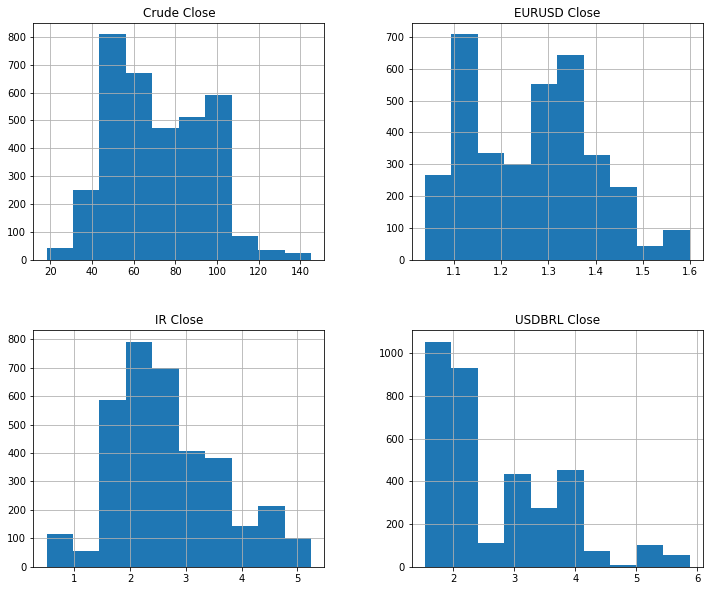

In [62]:
X.hist(figsize = (12,10))
plt.show()

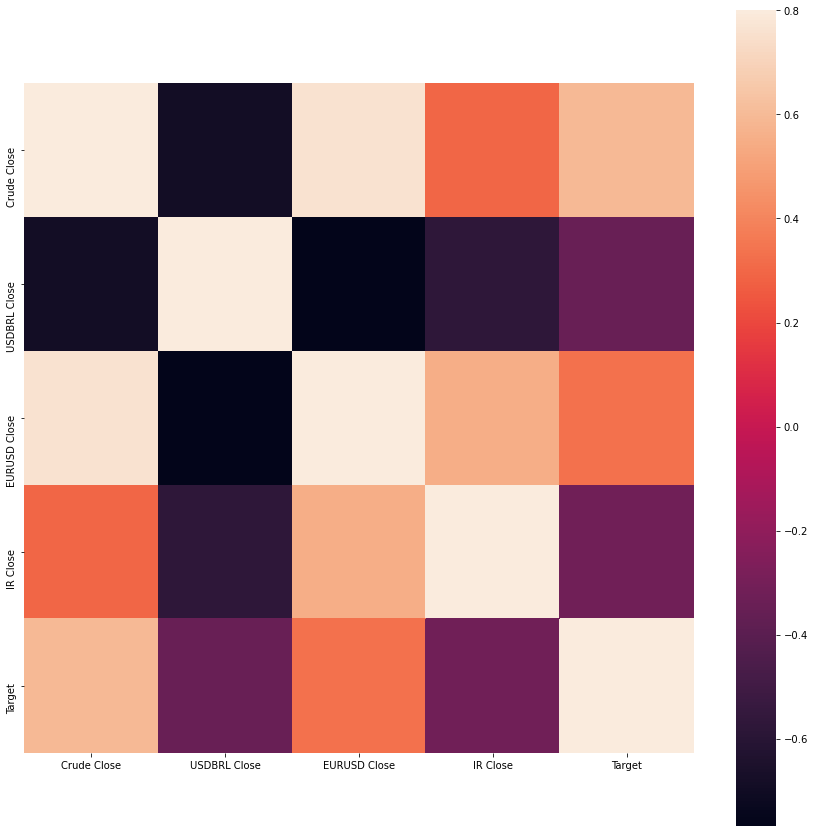

In [63]:
TrainData= X
TrainData["Target"]=s
C_mat = TrainData.corr()
fig = plt.figure(figsize = (15,15))
sb.heatmap(C_mat, vmax=.8, square = True)
plt.show()